
# Part 1


Let's first double check that we are in our own Drive folder so that we have all the files required, exactly where we need them.

In [1]:
!pwd

/Users/davidhartel/Desktop/mlss/day2


You should already have a couple of npz files from the MedMNIST repo saved on your GDrive folder. Let's go ahead a load a couple of them

In [69]:
from numpy import load

medmnist_data = load('chestmnist.npz')
# You can choose to load any of the datasets found in: https://zenodo.org/record/6496656
# adrenalmnist3d.npz, bloodmnist.npz, breastmnist.npz,	chestmnist.npz
# dermamnist.npz, fracturemnist3d.npz, nodulemnist3d.npz, octmnist.npz, etc...

lst = medmnist_data.files
# medmnist_data['train_images'] # This line will help you in the following section

In [70]:
# TODO Explore what the numpy load function returns when you are loading an .npz file

# 1. List the amount of items in each dataset split (i.e train, val, test)
# 2. Print out the different labels/classes of the dataset
# 3. Obtain a better insight of what type of information is included in the variable
#    medmnist_data

In [71]:
# 1. List the amount of items in each dataset split (i.e train, val, test)
print("Train images: ", medmnist_data['train_images'].shape)
print("Train labels: ", medmnist_data['train_labels'].shape)
print("Test images: ", medmnist_data['test_images'].shape)


Train images:  (78468, 28, 28)
Train labels:  (78468, 14)
Test images:  (22433, 28, 28)


In [72]:
# print labels
print("Labels: ", medmnist_data['train_labels'])

Labels:  [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Now, let's create our own dataset to be able to work with the npz file in a simpler way. We will be using Pytorch Dataset and DataLoader classes for this purpose.

In [73]:
import torch
from torchvision import transforms
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
from PIL import Image


class MyDataset(Dataset):
    def __init__(self, data, targets, transform=None):
        self.data = data
        self.targets = torch.LongTensor(targets)
        self.transform = transform

    def __getitem__(self, index):
        x = self.data[index]
        y = self.targets[index]

        if self.transform:
            # x = Image.fromarray(self.data[index].astype(np.uint8).transpose(1,2,0))
            x = Image.fromarray(self.data[index].astype(np.uint8)) # SOLUTION
            x = self.transform(x)

        return x, y

    def __len__(self):
        return len(self.data)




In [74]:
# TODO: Load the training split for the selected MedMNIST dataset
# 1. Access the train_imgs and train_labels
data = medmnist_data['train_images']
targets = medmnist_data['train_labels']



In [75]:
# TODO: Modify the transformations apply to the images in each batch
# 1. Apply different transformations to the images
# 2. The solarize transform is missing an argument?
# 3. What does the Resize transform do to the images?
# Note: The transformation is only applied to the images, not the targets (labels)

transform = transforms.Compose([
    transforms.Resize(100),
    # transforms...
    # transforms...
    transforms.ToTensor()])

dataset = MyDataset(data, targets, transform=transform)

# TODO: Define a batchsize for your dataloader
BATCH_SIZE = 5
dataloader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)

In [83]:
# TODO: Now load the validation and test split in the same way you did for training
# create a new MyDataset object for each split
# 1. Which variable names should we use? The same as before?
test_data = medmnist_data['test_images']
test_targets = medmnist_data['test_labels']
val_data = medmnist_data['val_images']
val_targets = medmnist_data['val_labels']

# Should we also apply transformations to the test and validation splits?
transform = transforms.Compose([
    transforms.Resize(100),
    # transforms...
    # transforms...
    transforms.ToTensor()])

val_dataset = MyDataset(val_data, val_targets, transform=transform)
test_dataset = MyDataset(test_data, test_targets, transform=transform)

val_dataloader = DataLoader(val_dataset, batch_size=64)
test_dataloader = DataLoader(test_dataset, batch_size=64)

In [84]:
# TODO: Use your new MyDataset objects to interact with your data
# 1. Print out the length of your dataset
# 2. Print out the 1st element of the dataset to understand what is being returned
# 3. Do the same for train, val and test splits
# Note: You can go back to the definition of MyDataset to see which attribute you
# defined and modify according to your requirements


In [85]:
# Print out the length of your dataset
print("Train dataset length: ", len(dataset))
print("Val dataset length: ", len(val_dataset))
print("Test dataset length: ", len(test_dataset))

Train dataset length:  78468
Val dataset length:  11219
Test dataset length:  22433


In [86]:
# Print out the 1st element of the dataset 
print("First element of the dataset: ", dataset[0])
print("First element of the val dataset: ", val_dataset[0])

First element of the dataset:  (tensor([[[0.2392, 0.2392, 0.2000,  ..., 0.0863, 0.0863, 0.0863],
         [0.2392, 0.2392, 0.2000,  ..., 0.0863, 0.0863, 0.0863],
         [0.2353, 0.2353, 0.1961,  ..., 0.0941, 0.0941, 0.0941],
         ...,
         [0.2471, 0.2471, 0.2039,  ..., 0.6627, 0.6196, 0.6196],
         [0.2510, 0.2510, 0.2078,  ..., 0.6745, 0.6314, 0.6314],
         [0.2510, 0.2510, 0.2078,  ..., 0.6745, 0.6314, 0.6314]]]), tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))
First element of the val dataset:  (tensor([[[0.0118, 0.0118, 0.0078,  ..., 0.0039, 0.0039, 0.0039],
         [0.0118, 0.0118, 0.0078,  ..., 0.0039, 0.0039, 0.0039],
         [0.0118, 0.0118, 0.0078,  ..., 0.0039, 0.0039, 0.0039],
         ...,
         [0.0078, 0.0078, 0.0078,  ..., 0.0039, 0.0039, 0.0039],
         [0.0118, 0.0118, 0.0118,  ..., 0.0039, 0.0039, 0.0039],
         [0.0118, 0.0118, 0.0118,  ..., 0.0039, 0.0039, 0.0039]]]), tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]))


In [87]:
# TODO: Extract 1 batch of your dataset
# 1. How many elements will does your batch have? Why is that?
# 2. Is there a notable difference between a train batch vs split/test batch?
# next(iter(dataloader))

In [88]:
# Extract 1 batch of your dataset
batch = next(iter(dataloader))
print("Batch length: ", len(batch))


Batch length:  2


Now let's plot some of our images to make this a bit more interactive for us.
I find that it is always easier to work with any project when first understand how your data is built, the datatypes and the number of elements you are working with.

In [89]:
import matplotlib.pyplot as plt

# TODO: Currently, our imshow function works as it is, but we can make some changes to improve
# the visualization of our dataset
# 1. Test some modifications regarding the plot size, and imshow arguments.
# 2. What is the starred (**) line doing?

def imshow(inp, title=None):
    """Display image for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))

    # Question: Where do this values come from? Why does each list have 3 different values?
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    #-----------------------------------

    inp = std * inp + mean #**
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


Let's make use of our dataset and our imshow function to display some images.

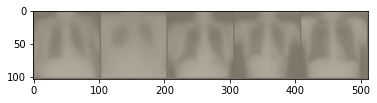

In [90]:
# TODO
# 1. Play around with your batch size and other parameters of your transforms
# to analyze what is their effect on our images.

# Get a batch of training data
inputs, classes = next(iter(dataloader))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out)